Odysseas Stefanakis, Grade 10, William Aberhart High School

CYSF, March 2024

In [ ]:
#Installation of the OpenCV python library
!pip install opencv-python

import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

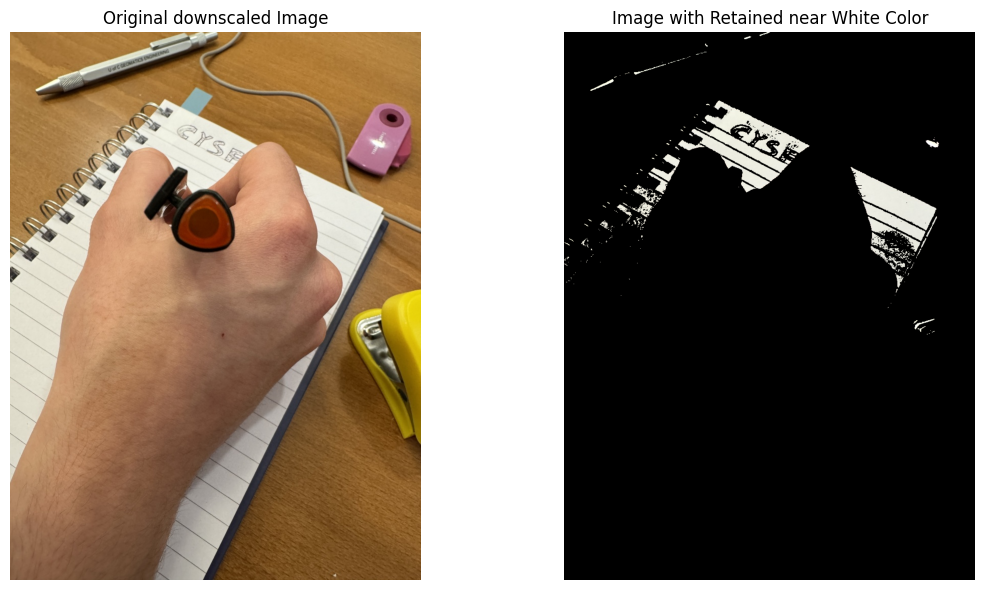

True

In [ ]:
#Image segmentation based on page color

import matplotlib.pyplot as plt
import cv2

#downscale an image to HD (needed when the resolution of the input image is high)
def downscale_to_hd(image_path, output_path, dimension=(1920, 1080)):
    # Load image
    img = cv2.imread(image_path)

    # Resize image
    # First calculate the ratio to keep the aspect ratio intact
    height, width = img.shape[:2]
    ratio = min(dimension[0] / width, dimension[1] / height)
    new_size = (int(width * ratio), int(height * ratio))

    resized_img = cv2.resize(img, new_size, interpolation=cv2.INTER_AREA)

    # Save downscaled image
    cv2.imwrite(output_path, resized_img)

#Create a segmentation based on page color (RGB renge as of next line)
def retain_white_color(img, lower_white=np.array([220, 220, 220]),
                       upper_white=np.array([255, 255, 255])):
    """Retain only the near white color in an image."""

    # Create a binary mask where near white regions are set to 1, others to 0
    mask = cv2.inRange(img, lower_white, upper_white)

    # Use the mask to obtain only the near white regions from the original image
    white_img = cv2.bitwise_and(img, img, mask=mask)

    return mask, white_img


image_path = "IP_input_image.jpg"         # original image name
output_path = "downscaled_image.jpg"      # downscale image name
downscale_to_hd(image_path, output_path)  # downscale the original image

img = cv2.imread("downscaled_image.jpg")

# Retain only near page (white) color
mask, white_img = retain_white_color(img)

# Display the original and images side by side with the retained white color
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Display downscaled original image
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original downscaled Image")
ax[0].axis('off')

# Display image with retained white color
ax[1].imshow(cv2.cvtColor(white_img, cv2.COLOR_BGR2RGB))
ax[1].set_title("Image with Retained near White Color")
ax[1].axis('off')

plt.tight_layout()
plt.show()

cv2.imwrite('segmented_image.jpg', white_img)  # save segmented image


Number of detected corners: 21819


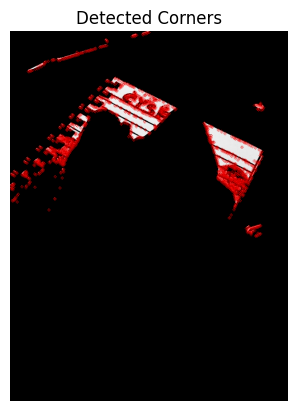

In [ ]:
#Harris Corner detection on the segmented image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the segmented image
image = cv2.imread('segmented_image.jpg', cv2.IMREAD_GRAYSCALE)

# Detect corners using Harris corner detection algorithm
dst = cv2.cornerHarris(image, blockSize=2, ksize=3, k=0.04)

# Dilate to mark the corners
dst = cv2.dilate(dst, None)

# Define a threshold to extract corners
threshold = 0.01 * dst.max()

# Find the coordinates of detected corners and save their coordinates in the two arrays
y_coords, x_coords = np.where(dst > threshold)

# Report the number of detected corners
num_corners = len(x_coords)
print(f"Number of detected corners: {num_corners}")

# Display the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Detected Corners')
plt.scatter(x_coords, y_coords, color='r', s=0.001)  # Plot the detected corner points in red
plt.axis('off')
plt.show()

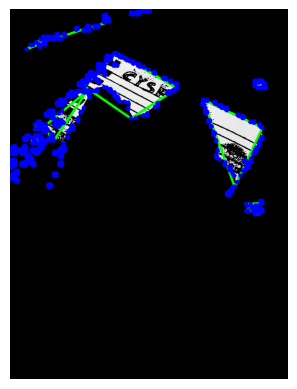

In [ ]:
#Extract polygons from a segmented image
#Generate the contour lines and highlight the corner points
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the segmented image
image = cv2.imread('segmented_image.jpg', cv2.IMREAD_GRAYSCALE)

# Find contours
contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Approximate contours to polygons
polygons = []
for cnt in contours:
    epsilon = 0.02 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    polygons.append(approx)

# Visualize the contours and corner points
image_color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(image_color, polygons, -1, (0, 255, 0), 5)  # Draw polygons in green

for idx, polygon in enumerate(polygons):
    for vertex_id, vertex in enumerate(polygon):
        x, y = vertex[0]
        cv2.circle(image_color, (x, y), 3, (255, 0, 0), 5)  # Mark the vertex with a blue dot

plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

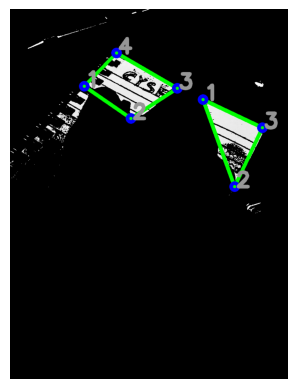

In [ ]:
#Same code as above with a filter to eliminate very small polygons
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the segmented image
image = cv2.imread('segmented_image.jpg', cv2.IMREAD_GRAYSCALE)

# Find contours
contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Approximate contours to polygons and filter out very small contours
min_area = 10000 # This is an example value for area = 100 sq pixel; adjust as needed
polygons = []
for cnt in contours:
    epsilon = 0.02 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)

    # Filtering small polygons by area
    if cv2.contourArea(approx) > min_area:
        polygons.append(approx)

# Visualize the result (larger polygons) and label the corner points
image_color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(image_color, polygons, -1, (0, 255, 0), 10)  # Draw polygons in green

font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 2
font_thickness = 2

for idx, polygon in enumerate(polygons):
    for vertex_id, vertex in enumerate(polygon):
        x, y = vertex[0]
        cv2.circle(image_color, (x, y), 10, (255, 0, 0), 10)  # Mark the vertex with a blue dot
        cv2.putText(image_color, f'{vertex_id + 1}', (x + 5, y), font, font_scale, (150, 150, 150), 10)

plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Polygon 1:
1 - (562, 264)
2 - (654, 518)
3 - (735, 346)

Polygon 2:
1 - (216, 225)
2 - (352, 319)
3 - (487, 231)
4 - (310, 128)

Qualified Points: 
[[735, 346], [310, 128], [216, 225]]

Image dimensions:
     Width: 810
     Height: 1080



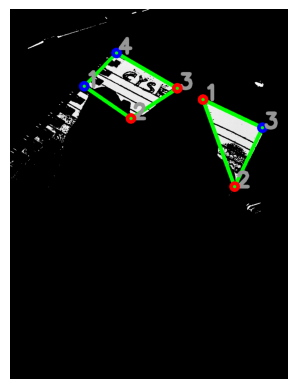

In [ ]:
#Filter the above corner points by angle

import math

def compute_angle(A, B, C):
    # Compute the lengths of the line segments
    BA = math.sqrt((A[0] - B[0])**2 + (A[1] - B[1])**2)
    BC = math.sqrt((C[0] - B[0])**2 + (C[1] - B[1])**2)
    AC = math.sqrt((A[0] - C[0])**2 + (A[1] - C[1])**2)

    # Use the law of cosines to find the angle
    cos_angle = (BA**2 + BC**2 - AC**2) / (2 * BA * BC)

    # Use the arccosine function to find the angle in radians
    angle_rad = math.acos(cos_angle)

    # Convert the angle to degrees
    angle_deg = math.degrees(angle_rad)

    return angle_deg

all_points = []   # array with all eligible corner points
best_points = []  # array of best points (meeting the filter criterion)

image_color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(image_color, polygons, -1, (0, 255, 0), 10)  # Draw polygons in green

font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 2
font_thickness = 2

for idx, polygon in enumerate(polygons):
    for vertex_id, vertex in enumerate(polygon):
        x, y = vertex[0]
        cv2.circle(image_color, (x, y), 10, (255, 0, 0), 10)  # Mark the vertex with a blue dot
        cv2.putText(image_color, f'{vertex_id + 1}', (x + 5, y), font, font_scale, (150, 150, 150), 10)


# Print the coordinates of the polygon vertices
for idx, polygon in enumerate(polygons):
    print(f"Polygon {idx + 1}:")
    #for vertex in polygon:
    vv = []
    for vertex_id, vertex in enumerate(polygon):
        x, y = vertex[0]
        print(f"{vertex_id + 1} - ({x}, {y})")
        vv.append([x,y])
    print()

    # Compute the angle for each corner point

    vv.append(vv[0])
    vv.append(vv[1])
    #print(vv)
    #print(len(vv))
    iv = 1
    while (iv<=len(vv)-2):
        angle_iv = compute_angle(vv[iv-1], vv[iv], vv[iv+1])
        #print(angle_iv)
        if ((angle_iv < 70.) or (angle_iv > 110.)):    # angle range - adjust accordingly
          #print(vv[iv][0], vv[iv][1], angle_iv)
          cv2.circle(image_color, (vv[iv][0], vv[iv][1]), 10, (0, 0, 255), 10)  # Mark the vertex with a read dot
        else:
          best_points.append(vv[iv])
        iv +=1

    for vertex in polygon:
      x, y = vertex[0]
      all_points.append([x,y])

# Report best points (those that meet the angle condition)
print("Qualified Points: ")
print(best_points)
print()

# Compute image dimensions
# Get the dimensions
height, width = image.shape
# Report the image dimensions
print("Image dimensions:")
print(f"     Width: {width}")
print(f"     Height: {height}")
print()

plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

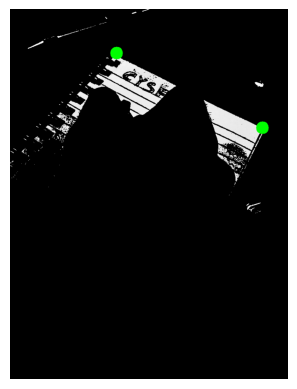

In [ ]:
# Filter corner points by isolation

# Definition of a ranked array of best points
rankbest = []

image_color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#cv2.drawContours(image_color, polygons, -1, (0, 255, 0), 10)  # Draw polygons in green

# For each of the best points (from previous code) calculate the number of
# Harris detected corner points within a range of 5 pixels along x and y.
# Rank the best points based on isolation (best is the point that has the
# fewest neighbor corner points)
ri = 0
for p in best_points:
  #print(p[0],p[1])
  num=0
  for x, y in zip(x_coords, y_coords):
    if ( abs(p[0]-x) < 5 and abs(p[1]-y) < 5 ):
      num+=1
    else:
      continue
  rankbest.append(num)
  ri +=1

rj = 0
rr = 0
rb = rankbest[rj]
while (rj < len(rankbest)):
  if (rankbest[rj] < rb):
    rb = rankbest[rj]
    rr = rj
  rj +=1

# draw the top two best points and save the image as "image_corner.jpg"
ro = 0
for p in best_points:
  if (ro < 2):
    cv2.circle(image_color, (p[0], p[1]), 3, (0, 255, 0), 30)  # Mark the vertex with a green dot
    ro +=1

cv2.imwrite('image_corner.jpg', image_color)

plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

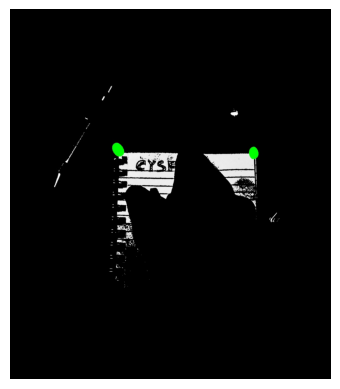

In [ ]:
# Warp perspective transformation to rectify the tilted image
import cv2
import numpy as np

def rotate_image(image_path, angle_x, angle_y, angle_z):
    # Load the image
    image = cv2.imread(image_path)

    # Convert angles from degrees to radians
    angle_x = np.radians(angle_x)
    angle_y = np.radians(angle_y)
    angle_z = np.radians(angle_z)

    # Get the image dimensions
    h, w = image.shape[:2]

    # Calculate the rotation matrices around each axis
    Rx = np.array([[1, 0, 0],
                   [0, np.cos(angle_x), -np.sin(angle_x)],
                   [0, np.sin(angle_x), np.cos(angle_x)]])

    Ry = np.array([[np.cos(angle_y), 0, np.sin(angle_y)],
                   [0, 1, 0],
                   [-np.sin(angle_y), 0, np.cos(angle_y)]])

    Rz = np.array([[np.cos(angle_z), -np.sin(angle_z), 0],
                   [np.sin(angle_z), np.cos(angle_z), 0],
                   [0, 0, 1]])

    # Combine the rotation matrices
    R = Rz @ Ry @ Rx

    # Assume focal length is the average of image width and height
    f = (w + h) / 2
    K = np.array([[f, 0, w/2],
                  [0, f, h/2],
                  [0, 0, 1]])

    # Calculate the final warp matrix
    warp_matrix = K @ R @ np.linalg.inv(K)

    # Determine the size of the resulting image
    # Calculate the corners after rotation
    corners = np.array([[0, 0, 1],
                        [w, 0, 1],
                        [w, h, 1],
                        [0, h, 1]])
    new_corners = np.dot(warp_matrix, corners.T).T

    # Normalize the corners
    new_corners = new_corners / new_corners[:, 2].reshape(-1, 1)

    # Find the bounding box of the new corners
    x_min, y_min = np.min(new_corners, axis=0)[:2]
    x_max, y_max = np.max(new_corners, axis=0)[:2]

    # Calculate the size of the new canvas
    new_w, new_h = np.ceil(x_max - x_min).astype(int), np.ceil(y_max - y_min).astype(int)

    # Adjust the warp matrix to consider the translation
    translation_matrix = np.array([[1, 0, -x_min],
                                   [0, 1, -y_min],
                                   [0, 0, 1]])
    warp_matrix = translation_matrix @ warp_matrix

    # Perform the warp perspective transformation with the new canvas size
    rectified_image = cv2.warpPerspective(image, warp_matrix, (new_w, new_h))

    return rectified_image

# Rectify the image from the previous code
# Read the three rotation angls by x, y, and z from the gyroscope and add
# these to the next line (the last three numbers: <x>, <y>, <z>)
rotated_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
rectified_img = rotate_image('image_corner.jpg', 25, 3, -31)
cv2.imwrite('rectified_image.jpg', rotated_img)

# Draw the rectified image
plt.imshow(cv2.cvtColor(rectified_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()